In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df=df.drop(columns="Email No.")

In [5]:
x=df.drop(columns="Prediction")
y=df["Prediction"]

In [6]:
df.duplicated().sum()

541

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75,random_state=42)

In [8]:
#C = 1.0
#svc = svm.SVC(kernel='rbf',gamma = 10 , C=100).fit(x, y) 

In [9]:
"""
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h)) 
" " "

SyntaxError: EOF while scanning triple-quoted string literal (584009698.py, line 7)

In [10]:
model = LogisticRegression(max_iter=1000, penalty='l2') #penalty l2 ridge default to avoid overfit
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_predtrain = model.predict(x_train)

In [12]:
y_predtest = model.predict(x_test)

In [13]:
accuracy_train = accuracy_score(y_train, y_predtrain)
accuracy_train

0.9994844031967002

In [14]:
accuracy_test = accuracy_score(y_test, y_predtest)
accuracy_test

0.9698375870069605

In [15]:
confusion_matrix(y_test , y_predtest)

array([[889,  24],
       [ 15, 365]], dtype=int64)

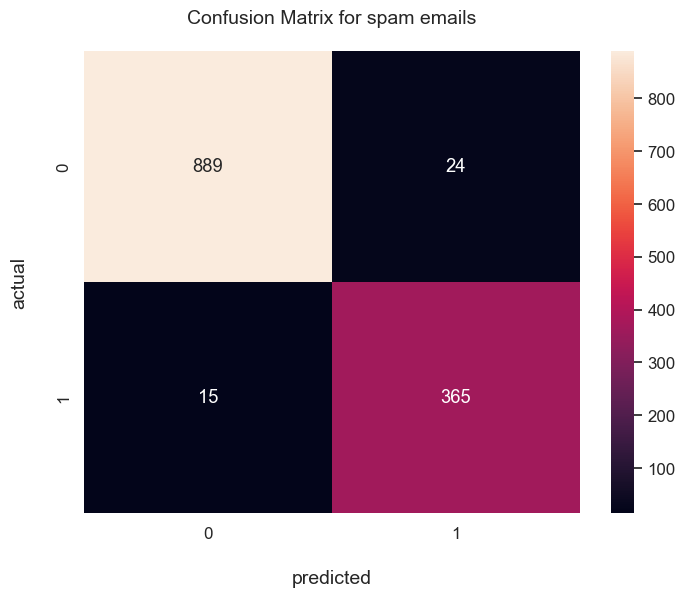

In [17]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
ax = sns.heatmap(confusion_matrix(y_test , y_predtest), annot=True, fmt='d', )
 
# set x-axis label and ticks. 
ax.set_xlabel("predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['0', '1'])
 
# set y-axis label and ticks
ax.set_ylabel("actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['0', '1'])
 
# set plot title
ax.set_title("Confusion Matrix for spam emails", fontsize=14, pad=20)
 
plt.show()